# Análisis de sentimiento

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device: -1

              tweet_id                username     user_id  \
0  1884596700494373303                Kely LDU   484983040   
1  1884596162100871179               NotiMundo  2457143496   
2  1884595351010812255    El Nuevo País y Zeta   168237054   
3  1884595019513815205  HCH Televisión Digital   505076949   
4  1884594727959298146    CarlosSanchezBerzain  3073682337   

                                                text  \
0   una sola vuelta todo todito 7  daniel noboa p...   
1    tras la visita de edmundo gonzález a ecuador...   
2  venezolanos en ecuador aclamaron a edmundo gon...   
3    el presidente de ecuador daniel noboa recibi...   
4   ofrecerá su petróleo a socios de  para frenar...   

                       created_at  retweet_count  favorite_count sentimiento  
0  Wed Jan 29 13:37:22 +0000 2025              0               0    negativo  
1  Wed Jan 29 13:35:13 +0000 2025              1               2    positivo  
2  Wed Jan 29 13:32:00 +0000 2025        

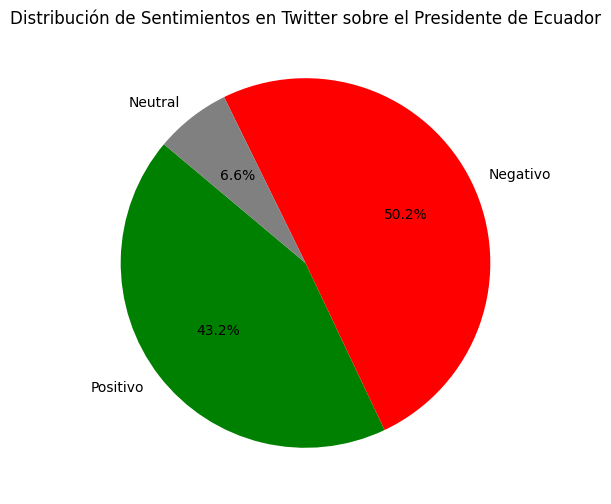

In [1]:
import pandas as pd
import re
import emoji
import torch
import matplotlib.pyplot as plt
from transformers import pipeline

# Cargar los datos desde el archivo CSV
file_path = "tweets.csv"
df = pd.read_csv(file_path)

# Función para limpiar el texto
def limpiar_texto(texto):
    texto = str(texto)  # Asegurar que es texto
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r"http\S+|www\S+", "", texto)  # Eliminar URLs
    texto = re.sub(r"@\w+", "", texto)  # Eliminar menciones
    texto = re.sub(r"#\w+", "", texto)  # Eliminar hashtags
    texto = re.sub(r"[^\w\s]", "", texto)  # Eliminar signos de puntuación
    texto = emoji.demojize(texto)  # Convertir emojis a texto
    return texto

# Aplicar limpieza a los tweets
df["text"] = df["text"].apply(limpiar_texto)

# Definir el dispositivo (GPU si está disponible, de lo contrario CPU)
device = 0 if torch.cuda.is_available() else -1
print(f"Device: {device}")

# Cargar el modelo de análisis de sentimiento
modelo_sentimiento = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)

# Función para analizar sentimiento
def analizar_sentimiento_avanzado(texto):
    try:
        resultado = modelo_sentimiento(texto[:512])  # Limitar el texto a 512 caracteres
        etiqueta = int(resultado[0]['label'].lower().split()[0])
        if etiqueta > 3:
            return "positivo"
        elif etiqueta < 3:
            return "negativo"
        else:
            return "neutral"
    except Exception as e:
        print(f"Error al procesar el texto: {texto} - {e}")
        return "error"

# Aplicar análisis de sentimiento a los tweets
df["sentimiento"] = df["text"].apply(analizar_sentimiento_avanzado)

# Guardar el resultado con la columna de sentimientos
df.to_csv("tweets_sentimiento.csv", index=False)

# Mostrar las primeras filas con el sentimiento calculado
print(df.head())

# Contar la cantidad de tweets por cada sentimiento
positivos = (df["sentimiento"] == "positivo").sum()
negativos = (df["sentimiento"] == "negativo").sum()
neutrales = (df["sentimiento"] == "neutral").sum()

# Crear un gráfico de pastel para visualizar la distribución de sentimientos
plt.figure(figsize=(8, 6))
labels = ["Positivo", "Negativo", "Neutral"]
sizes = [positivos, negativos, neutrales]
colors = ["green", "red", "gray"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Distribución de Sentimientos en Twitter sobre el Presidente de Ecuador")

# Mostrar la gráfica
plt.show()
